In [4]:

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
from mpl_toolkits.basemap import Basemap



terror_df = pd.read_csv('terrorism.csv')


terror_df.rename(columns = {'eventid': 'EventId', 'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region', 'provstate':'State', 'city':'City', 'latitude':'Latitude', 'longitude':'Longitude', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide','attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubtype', 'target1':'Target', 'natlty1_txt': 'TargetNationality', 'gname':'GroupName', 'weaptype1_txt':'WeaponType', 'weapsubtype1_txt':'WeaponSubtype','nkill':'Killed','nwound':'Wounded', 'individual':'Individual','nperps':'#Perpetrators','related':'CoordinatedAttacks'}, inplace=True)
terror_df = terror_df[['EventId','Year','Month','Day','Country','Region','State','City','Latitude','Longitude','Multiple','Success','Suicide','AttackType','TargetType','TargetSubtype','Target','TargetNationality','GroupName','WeaponType','WeaponSubtype','Killed','Wounded','Individual','#Perpetrators','CoordinatedAttacks']]
terror_df.set_index('EventId', inplace=True)
string_cols = ["State","City","TargetSubtype","Target","TargetType", "TargetNationality","GroupName", "WeaponType", "WeaponSubtype"]
terror_df[string_cols] = terror_df[string_cols].fillna('Unknown')
int_cols = ["Killed", "Wounded"]
terror_df[int_cols] = terror_df[int_cols].fillna(-1)



# Total Terrorist Attacks in the World 

In [5]:
world = pd.value_counts(terror_df['Year'].values, sort=False)

#Set years of comparison
terror_years = np.arange(1970, 2016)

#Plot line diagram with tracer
trace = [go.Scatter(
         x = terror_years,
         y = world,
         mode = 'lines',
         line = dict(
             color = 'gray',
             width = 3),
             name = 'Attacks per Year'
         )]

layout = go.Layout(
         title = 'Total Global Terrorist Attacks Over Time',
         xaxis = dict(
             rangeslider = dict(thickness = 5),
             showgrid = False,
             color = 'black',
         ),
         yaxis = dict(
             range = [0.1, 17000],
             showgrid = True)
         )

figure = dict(data = trace, layout = layout)
iplot(figure)

# The Countries Most Affected by Terrorism in 2016

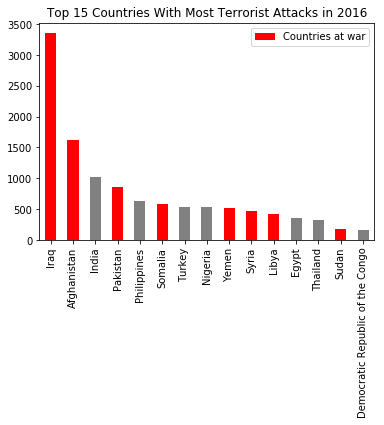

In [17]:
#Select 15 countries with most attacks in 2016
top15 = terror_df[(terror_df.Year == 2016)].Country.value_counts()[:15]

#Create a bar chart where the countries currently participating in a major armed conflict/war are colored red
ax = top15.plot(kind = 'bar', title='Top 15 Countries With Most Terrorist Attacks in 2016', color =  ['red', 'red', 'gray', 'red', 'gray','red','gray', 'gray', 'red', 'red', 'red', 'gray', 'gray', 'red', 'gray']) 

#Clearify in legend what the red countries are
ax.legend(["Countries at war"]);


# How Do These Countries Differ From the Rest of the World? 

In [6]:
#Create df from countries above
countriesAtWar_df = terror_df[terror_df.Country.isin(['Yemen', 'Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan'])]
countriesAtWar = pd.value_counts(countriesAtWar_df['Year'].values, sort = False)

#Calculate average attack per year in countries at war
meanCountriesAtWar = countriesAtWar / len(countriesAtWar_df.Country.unique())

#Sort by index
meanCountriesAtWar = meanCountriesAtWar.sort_index()


#Create df from all countries in the world
world = pd.value_counts(terror_df['Year'].values, sort=False)

#Calculate average attack per year globally
meanOfWorld = world/len(terror_df.Country.unique())


# Terrorist attacks by year
terror_peryear_world = np.asarray(meanOfWorld)
terror_peryear_countries = meanCountriesAtWar

#Set years of comparison
terror_years = np.arange(1970, 2016)


#Plot line diagram with tracer
trace = [go.Scatter(
         x = terror_years,
         y = terror_peryear_world,
         mode = 'lines',
         line = dict(
             color = 'gray',
             width = 3),
             name = 'Global mean'
         ),
        go.Scatter(
         x = terror_years,
         y = terror_peryear_countries,
         mode = 'lines',
         line = dict(
             color = 'red',
             width = 3),
            name = 'Countries at War'
         )]

layout = go.Layout(
         title = 'Average attacks per year',
         xaxis = dict(
             rangeslider = dict(thickness = 5),
             showgrid = False,
             color = 'black',
         ),
         yaxis = dict(
             range = [0.1, 1350],
             showgrid = True)
         )

figure = dict(data = trace, layout = layout)
iplot(figure)


# A closer Look on Each Country

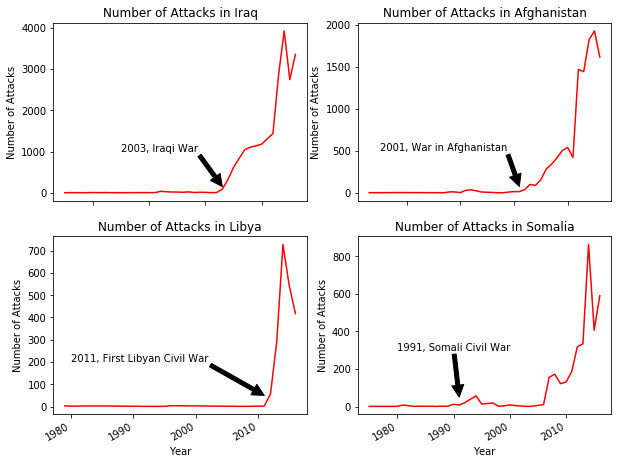

In [7]:
#Get attacks per year in Iraq
irq = terror_df[terror_df.Country == 'Iraq']
irq = irq.groupby('Year').size()

#Get attacks per year in Afghanistan
afg = terror_df[terror_df.Country == 'Afghanistan']
afg = afg.groupby('Year').size()

#Get attacks per year in Libya
lib = terror_df[terror_df.Country == 'Libya']
lib = lib.groupby('Year').size()

#Get attacks per year in Somalia
som = terror_df[terror_df.Country == 'Somalia']
som = som.groupby('Year').size()

#Create a 2x2 figure
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#Plot attacks in Iraq and use an arrow to point out when current war began
ax1.set(title = 'Number of Attacks in Iraq', ylabel = 'Number of Attacks', xlabel = 'Year')
ax1.plot(irq, color = 'red')
ax1.annotate('2003, Iraqi War', xy=(2003, 150), xytext=(1985, 1000),
           arrowprops=dict(facecolor='black', shrink=150))

#Plot attacks in Afghanistan and use an arrow to point out when current war began
ax2.set(title = 'Number of Attacks in Afghanistan', ylabel = 'Number of Attacks', xlabel = 'Year')
ax2.plot(afg, color = 'red')
ax2.annotate('2001, War in Afghanistan', xy=(2001, 75), xytext=(1975, 500),
           arrowprops=dict(facecolor='black', shrink=1.50))

#Plot attacks in Libya and use an arrow to point out when current war began
ax3.set(title = 'Number of Attacks in Libya', ylabel = 'Number of Attacks', xlabel = 'Year')
ax3.plot(lib, color = 'red')
ax3.annotate('2011, First Libyan Civil War', xy=(2011, 50), xytext=(1980, 200),
           arrowprops=dict(facecolor='black', shrink=150))

#Plot attacks in Somalia and use an arrow to point out when current war began
ax4.set(title = 'Number of Attacks in Somalia', ylabel = 'Number of Attacks', xlabel = 'Year')
ax4.plot(som, color = 'red')
ax4.annotate('1991, Somali Civil War', xy=(1991, 50), xytext=(1980, 300),
           arrowprops=dict(facecolor='black', shrink=150))

fig.autofmt_xdate()

# A closer Look on Each Country

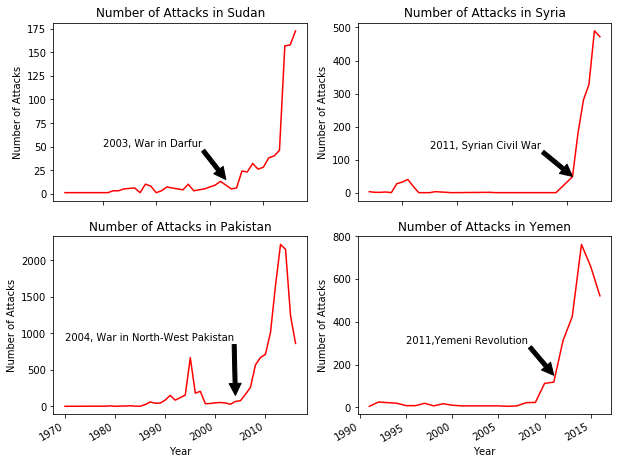

In [8]:
#Get attacks per year in Sudan
sud = terror_df[terror_df.Country == 'Sudan']
sud = sud.groupby('Year').size()

#Get attacks per year in Syria
syr = terror_df[terror_df.Country == 'Syria']
syr= syr.groupby('Year').size()

#Get attacks per year in Pakistan
pak = terror_df[terror_df.Country == 'Pakistan']
pak = pak.groupby('Year').size()

#Get attacks per year in Yemen
yem = terror_df[terror_df.Country == 'Yemen']
yem = yem.groupby('Year').size()


#Create a 2x2 figure
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#Plot attacks in Sudan and use an arrow to point out when current war began
ax1.set(title = 'Number of Attacks in Sudan', ylabel = 'Number of Attacks', xlabel = 'Year')
ax1.plot(sud, color = 'red')
ax1.annotate('2003, War in Darfur', xy=(2003, 15), xytext=(1980, 50),
           arrowprops=dict(facecolor='black', shrink=150))

#Plot attacks in Syria and use an arrow to point out when current war began
ax2.set(title = 'Number of Attacks in Syria', ylabel = 'Number of Attacks', xlabel = 'Year')
ax2.plot(syr, color = 'red')
ax2.annotate('2011, Syrian Civil War', xy=(2011, 50), xytext=(1985, 135),
           arrowprops=dict(facecolor='black', shrink=150))

#Plot attacks in Pakistan and use an arrow to point out when current war began
ax3.set(title = 'Number of Attacks in Pakistan', ylabel = 'Number of Attacks', xlabel = 'Year')
ax3.plot(pak, color = 'red')
ax3.annotate('2004, War in North-West Pakistan', xy=(2004, 150), xytext=(1970, 900),
           arrowprops=dict(facecolor='black', shrink=150))

#Plot attacks in Yemen and use an arrow to point out when current war began
ax4.set(title = 'Number of Attacks in Yemen', ylabel = 'Number of Attacks', xlabel = 'Year')
ax4.plot(yem, color = 'red')
ax4.annotate('2011, Yemeni Revolution', xy=(2011, 150), xytext=(1995, 300),
           arrowprops=dict(facecolor='black', shrink=150))

fig.autofmt_xdate()

# Mapping Terrorist Attacks Before the Wars

C:\Users\madel\Anaconda3\envs\py2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

C:\Users\madel\Anaconda3\envs\py2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



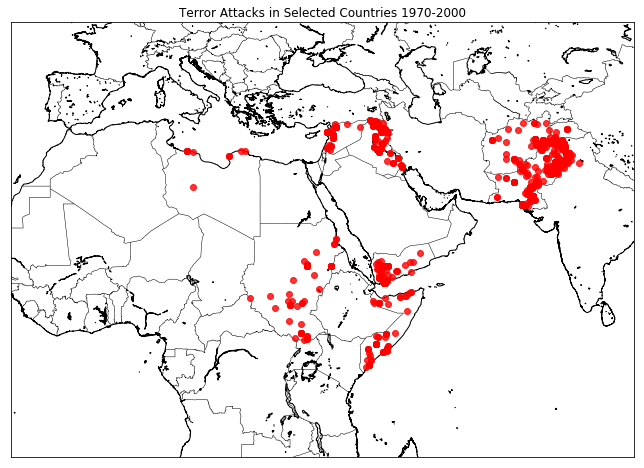

In [9]:
#Get number of attacks in countries at war before 2001, which is before all these countries entered war, except for Somalia
beforewar = terror_df[(terror_df.Year < 2001) & (terror_df.Country.isin(['Yemen','Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan']))]

#Create figure
plt.figure(figsize=(15,8))

#Set latitudes and longitudes and draw borders
ME = Basemap(projection='mill', llcrnrlat = -15, urcrnrlat = 50, llcrnrlon = -15, urcrnrlon = 85, resolution = 'h')
ME.drawcoastlines()
ME.drawcountries()
ME.drawstates()

#Mark out red point for every terror attack during these years
x, y = ME(list(beforewar["Longitude"].astype("float")), list(beforewar["Latitude"].astype("float")))
ME.plot(x, y, "go", markersize = 6, alpha = 0.8, color = "red")

#Display title and show figure
plt.title('Terror Attacks in Selected Countries 1970-2000')
plt.show()


# Mapping Terrorist Attacks After the Wars

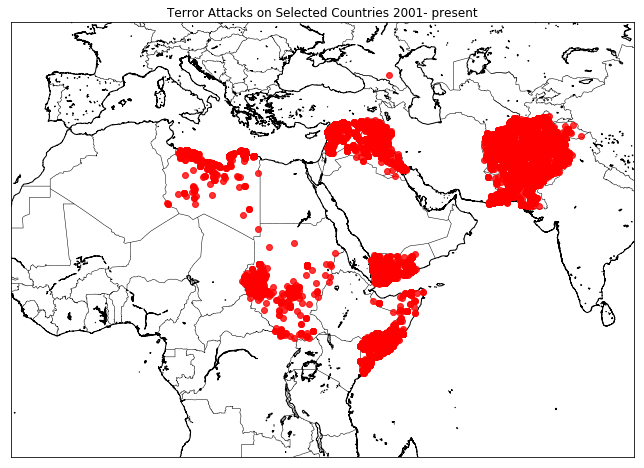

In [10]:
#Get number of attacks in countries at war after 2001, which is after all these countries entered war, except for Somalia
afterwar = terror_df[(terror_df.Year >= 2001) & (terror_df.Country.isin(['Yemen','Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan']))]

#Create figure
plt.figure(figsize=(15,8))

#Set longitudes and latitudes and draw borders
ME = Basemap(projection='mill', llcrnrlat = -15, urcrnrlat = 50, llcrnrlon = -15, urcrnrlon = 85, resolution = 'h')
ME.drawcoastlines()
ME.drawcountries()
ME.drawstates()

#Mark out points for each terror attack during these years
x, y = ME(list(afterwar["Longitude"].astype("float")), list(afterwar["Latitude"].astype(float)))
ME.plot(x, y, "go", markersize = 6, alpha = 0.8, color = "red")

#Present title and show map
plt.title('Terror Attacks on Selected Countries 2001- present')
plt.show()

# How Many Groups are Active in These Countries?

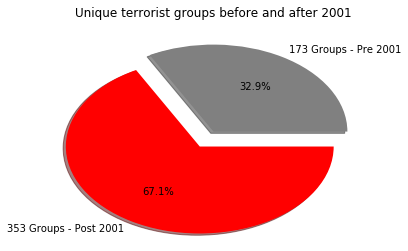

In [11]:
#Create list of all groups comitted attacks after the wars started
afterwar = terror_df[(terror_df.Year >= 2001) & (terror_df.Country.isin(['Yemen', 'Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan']))]
x = len(afterwar.GroupName.unique())

#Create list of all groups comitted attacks after the wars started
beforewar = terror_df[(terror_df.Year < 2001) & (terror_df.Country.isin(['Yemen','Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan']))]
y = len(beforewar.GroupName.unique())


#Elements of pie chart
values = [x, y]
colors = ['red', 'gray']
labels = ['353 Groups - Post 2001', '173 Groups - Pre 2001']
explode = (0.2, 0)


# Create pie chart with above elements
plt.pie(values, colors=colors, labels=labels,
        autopct='%1.1f%%',
        explode = explode, counterclock=False, shadow=True)
plt.title('Unique terrorist groups before and after 2001')

plt.show()

# What Groups are Most Active in These Countries?

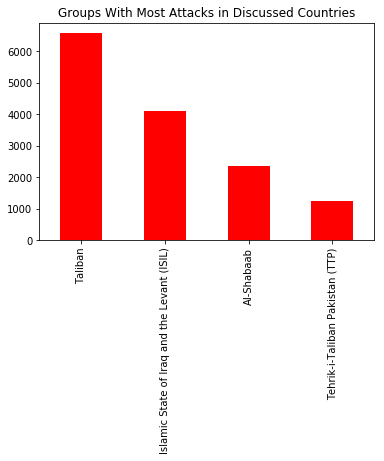

In [18]:
#Get top 4 groups with most attacks in the area and create bar chart of these
countriesAtWar = terror_df[terror_df.Country.isin(['Yemen','Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan']) & (terror_df.GroupName != 'Unknown')]

countriesAtWar.GroupName.value_counts().head(4).plot(kind = 'bar', title = 'Groups With Most Attacks in Discussed Countries', color = 'red')

# The Escalation of These Four Groups

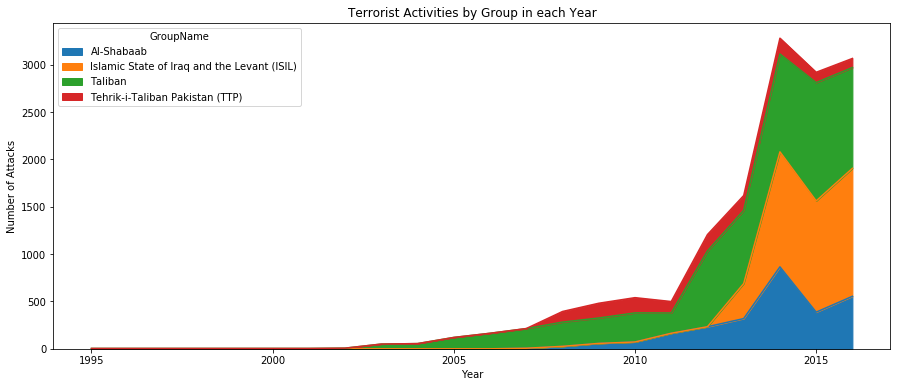

In [13]:
#Get number of attacks these groups have performed in the eight countries discussed
groups = terror_df[(terror_df.GroupName == 'Tehrik-i-Taliban Pakistan (TTP)') | (terror_df.GroupName == 'Taliban') | (terror_df.GroupName == 'Al-Shabaab') | (terror_df.GroupName == 'Islamic State of Iraq and the Levant (ISIL)') & (terror_df.Country.isin(['Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan']))]

#Plot their attacks over time in discussed countries
pd.crosstab(terror_df.Year, groups.GroupName).plot(kind='area',figsize=(15,6), legend = True)
plt.title('Terrorist Activities by Group in each Year')
plt.ylabel('Number of Attacks')
plt.show()

# How Big Impact do These Four Groups Have? 

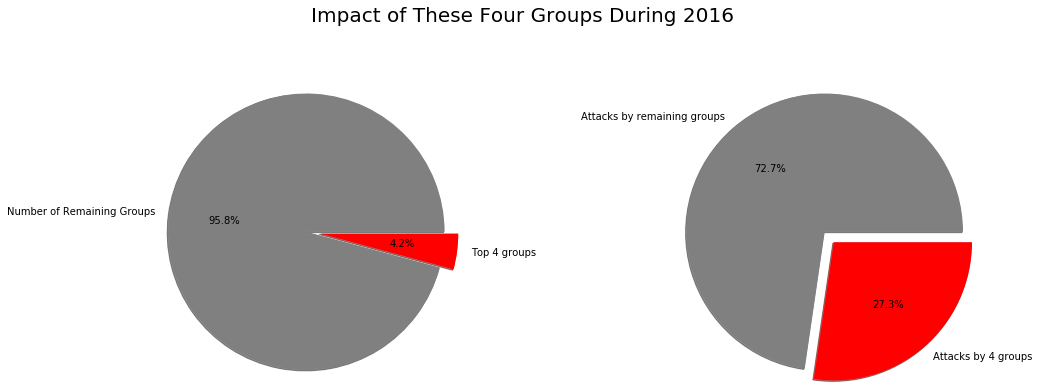

In [14]:
#Count all the attacks of thse groups in the discussed countries during 2016
attacks_in_2016_by_groups = terror_df[((terror_df.GroupName == 'Islamic State of Iraq and the Levant (ISIL)') | (terror_df.GroupName == 'Al-Shabaab') | (terror_df.GroupName == 'Taliban') | (terror_df.GroupName == 'Tehrik-i-Taliban Pakistan (TTP)'))  & (terror_df.Country.isin(['Yemen', 'Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan'])) & (terror_df.Year == 2016)]
attacks_in_2016_by_groups = attacks_in_2016_by_groups.Year.count()

#Count all attacks in the discussed countries during 2016
all_attacks= terror_df[terror_df.Country.isin(['Yemen','Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan']) &(terror_df.Year == 2016)]
all_attacks = all_attacks.Year.count()

#Count all active terror groups in the discussed countries during 2016
all_groups_in_2016 = terror_df[(terror_df.Year == 2016) & (terror_df.Country.isin(['Yemen','Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan']))]
x = len(all_groups_in_2016.GroupName.unique())

#Four represents the top four terror groups we have looked at in these countries
y = 4


#Create values for first pie chart
labels = 'Attacks by remaining groups', 'Attacks by 4 groups'
value = [all_attacks, attacks_in_2016_by_groups]

#Create values for second pie chart
labels1 = 'Number of Remaining Groups', 'Top 4 groups'
value1 = [x,y] 

#Determine colors and explode
colors = ['gray', 'red']
explode = [0,0.3]

#Create figure
fig = plt.figure()

#Plot first pie chart
ax1 = fig.add_axes([-0.2, 0, 0.4, 0.4], aspect=1)
ax1.pie(value1, labels=labels1, autopct='%1.1f%%', shadow=True, colors = colors, explode = explode, radius = 3)

#Plot second pie chart
ax2 = fig.add_axes([1, 0, 0.4, 0.4], aspect=1)  
ax2.pie(value, labels=labels, autopct='%1.1f%%', shadow=True, colors = colors, explode = explode, radius = 3)

#Present title and show figure
plt.suptitle('Impact of These Four Groups During 2016', fontsize=20)
plt.show()

# Reach of ISIL related groups in 2013

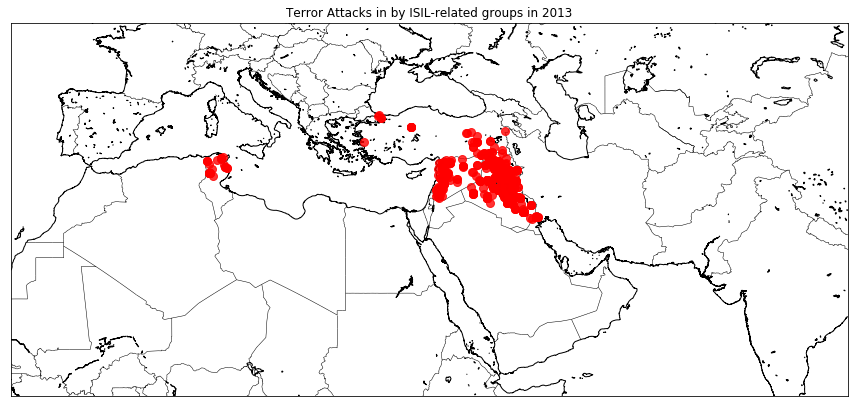

In [34]:
# Get countries which were attacked by ISIL-related groups in 2013
isilCountriesAttacked_2013 = terror_df[(terror_df.Year == 2013) & (terror_df.Country.isin(['Iraq','Syria', 'Tunisia', 'Turkey']))]

plt.figure(figsize=(15,8))

IC2013 = Basemap(projection='mill', llcrnrlat = 10, urcrnrlat = 50, llcrnrlon = -15, urcrnrlon = 85, resolution = 'h')
IC2013.drawcoastlines()
IC2013.drawcountries()
IC2013.drawstates()

x, y = IC2013(list(isilCountriesAttacked_2013["Longitude"].astype("float")), list(isilCountriesAttacked_2013["Latitude"].astype(float)))
IC2013.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#FF0000") # Plot basemap showing countries attacked

plt.title('Terror Attacks in by ISIL-related groups in 2013')
plt.show()

# Reach of ISIL related groups in 2014

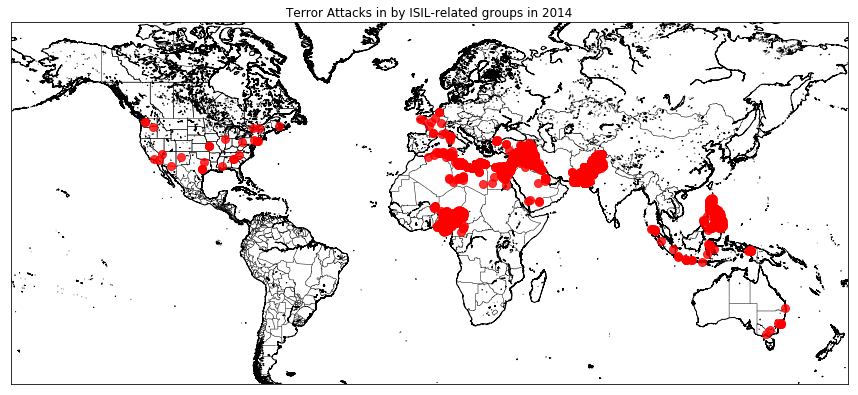

In [35]:
# Get countries which were attacked by ISIL-related groups in 2014
isilCountriesAttacked_2014 = terror_df[(terror_df.Year == 2014) & (terror_df.Country.isin(['Algeria', 'Australia', 'Belgium', 'Cameroon', 'Canada', 'Chad', 'Egypt', 'France', 'Indonesia', 'Iraq', 'Israel', 'Lebanon', 'Libya', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Saudi Arabia', 'Syria', 'Tunisia', 'Turkey', 'United States', 'West Bank and Gaza Strip']))]

plt.figure(figsize=(15,8))

IC2014 = Basemap(projection='mill', llcrnrlat = -55, urcrnrlat = 75, llcrnrlon = -180, urcrnrlon = 180, resolution = 'h')
IC2014.drawcoastlines()
IC2014.drawcountries()
IC2014.drawstates()

x, y = IC2014(list(isilCountriesAttacked_2014["Longitude"].astype("float")), list(isilCountriesAttacked_2014["Latitude"].astype(float)))
IC2014.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#FF0000") # Plot basemap showing countries attacked

plt.title('Terror Attacks in by ISIL-related groups in 2014')
plt.show()

# Reach of ISIL related groups in 2015

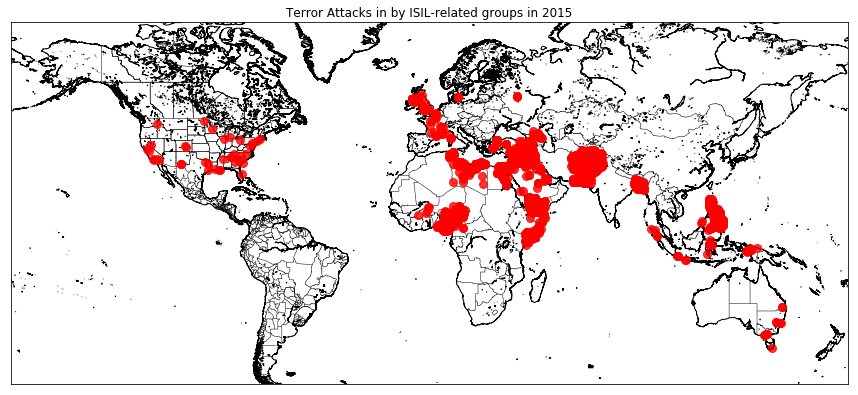

In [58]:
# Get countries which were attacked by ISIL-related groups in 2015
isilCountriesAttacked_2015 = terror_df[(terror_df.Year == 2015) & (terror_df.Country.isin(['Afghanistan', 'Australia', 'Bahrain', 'Bangladesh', 'Burkina Faso', 'Cameroon', 'Chad', 'Denmark', 'Egypt', 'France', 'Indonesia', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Russia', 'Saudi Arabia', 'Somalia', 'Syria', 'Tunisia', 'Turkey', 'United Kingdom', 'United States', 'West Bank and Gaza Strip', 'Yemen']))]

plt.figure(figsize=(15,8))

IC2015 = Basemap(projection='mill', llcrnrlat = -55, urcrnrlat = 75, llcrnrlon = -180, urcrnrlon = 180, resolution = 'h')
IC2015.drawcoastlines()
IC2015.drawcountries()
IC2015.drawstates()

x, y = IC2015(list(isilCountriesAttacked_2015["Longitude"].astype("float")), list(isilCountriesAttacked_2015["Latitude"].astype(float)))
IC2015.plot(x, y, "go", markersize = 8, alpha = 0.8, color = "#FF0000")

plt.title('Terror Attacks in by ISIL-related groups in 2015')
plt.show()

# Number of attacks per year by ISIL related groups Vs Non-ISIL related groups

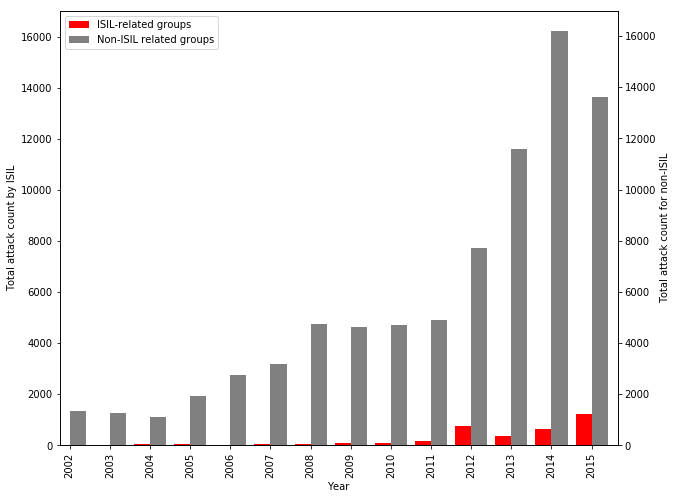

In [38]:
# Get all ISIL-related groups. These comprise of ISIL 'core', ISIL-affiliated, ISIL-Predecessors and ISIL-inspired groups
isilgroups = ['Adan-Abyan Province of the Islamic State',
                'Jund al-Khilafah (Tunisia)',
                'Algeria Province of the Islamic State',
                'Jundallah (Iran)','Jundallah (Pakistan)',
                'Ansar Al-Khilafa (Philippines)',
                'Khorasan Chapter of the Islamic State',
                'Bahrain Province of the Islamic State',
                'Lahij Province of the Islamic State',
                'Bangsamoro Islamic Freedom Movement (BIFM)',
                'Mujahidin Indonesia Timur (MIT)',
                'Barqa Province of the Islamic State',
                'Najd Province of the Islamic State',
                'Boko Haram', 'Okba Ibn Nafaa Brigade',
                'Caucasus Province of the Islamic State',
                'Sanaa Province of the Islamic State',
                'Fezzan Province of the Islamic State',
                'Shabwah Province of the Islamic State',
                'Hadramawt Province of the Islamic State',
                'Sheikh Omar Hadid Brigade',
                'Hijaz Province of the Islamic State',
                'Sinai Province of the Islamic State','Islamic Movement of Uzbekistan (IMU)',
                'Supporters of the Islamic State in Jerusalem',
                'Islamic State in Bangladesh',
                'Supporters of the Islamic State in the Land of the Two Holy Mosques',
                'Jamaah Ansharut Daulah', 'Tehrik-e-Khilafat',
                'Jund al-Khilafa (Algeria)', 'Tripoli Province of the Islamic State',
                'Al-Qaida in Iraq','Islamic State of Iraq (ISI)','Tawhid and Jihad',
                'Jund Ansar Allah','Kilafah Islamic Movement','Jihadi-inspired extremists',
                'ISIL']

# Get dataframe containing attacks by ISIL-related groups only from 2002 to 2015
isilrelated_df = terror_df[(terror_df.Year >= 2002) & (terror_df.Year <= 2015) &
                           (terror_df['GroupName'].isin(isilgroups))]
# Get dataframe containing attacks by non-ISIL related groups only from 2002 to 2015
nonisilrelated_df = terror_df[(terror_df.Year >= 2002) & (terror_df.Year <= 2015) &
                           (~ terror_df['GroupName'].isin(isilgroups))]


Attack_Count_isil =  isilrelated_df.groupby(['Year'])[['Year']].count() # Get total count of attacks per year by ISIL-related groups
Attack_Count_nonisil = nonisilrelated_df.groupby(['Year'])[['Year']].count() # # Get total count of attacks per year by Non-ISIL related groups

# Add column TotalAttacks with the total number of attacks in dataframe for each of ISIL-related and Non-ISIL related groups
Attack_Count_isil['TotalAttacks'] = Attack_Count_isil['Year']
Attack_Count_nonisil['TotalAttacks'] = Attack_Count_nonisil['Year']
fig = plt.figure(figsize = (10,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4 # Define the width of each bar

# Plot bar charts for ISIL-related and non-ISIL related groups
Attack_Count_isil['TotalAttacks'].plot(kind='bar', color='red', ax=ax, width=width, position=1, label='ISIL-related groups')
Attack_Count_nonisil['TotalAttacks'].plot(kind='bar', color='gray', ax=ax, width=width, position=0, label='Non-ISIL related groups')

ax.set_ylabel('Total attack count by ISIL')
ax2.set_ylabel('Total attack count for non-ISIL')

ax2.set_ylim(0,17000)
ax.legend()

plt.show()

# Number of deaths per ISIL related attack Vs Number of deaths per Non-ISIL related attacks

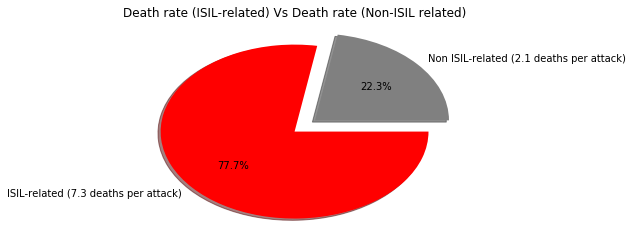

In [39]:
# Get total number of attacks each for ISIL-related and Non-ISIL related groups                                                        
isilRelatedAttacks, nonisilRelatedAttacks = len(isilrelated_df.index), len(nonisilrelated_df.index)

# Calculate number of deaths per attack for ISIL and Non-related groups
deathsPerAttack_isil = isilrelated_df[['Killed']].sum()
deathsPerAttack_isil = deathsPerAttack_isil[0]/isilRelatedAttacks

deathsPerAttack_nonisil = nonisilrelated_df[['Killed']].sum()
deathsPerAttack_nonisil = deathsPerAttack_nonisil[0]/nonisilRelatedAttacks

values = [deathsPerAttack_isil, deathsPerAttack_nonisil]
colors = ['r','gray']
labels = ['ISIL-related'+ ' (' + str(round(deathsPerAttack_isil,1)) + ' deaths per attack)', 'Non ISIL-related' + ' (' + str(round(deathsPerAttack_nonisil,1)) + ' deaths per attack)']
explode =(0,0.2)

plt.pie(values, colors=colors, labels=labels, 
        autopct='%.1f%%', explode=explode, counterclock=False, shadow=True)
plt.title('Death rate (ISIL-related) Vs Death rate (Non-ISIL related)')

plt.show()

# Number of attacks per year by ISIL related groups vs Number of attacks per year by Non-ISIL related groups

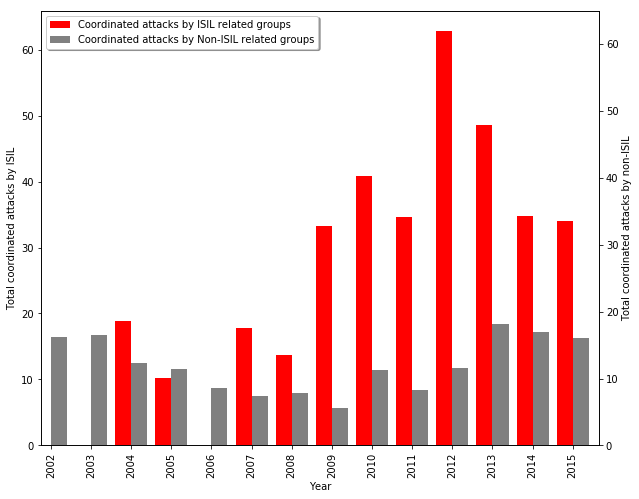

In [40]:
# Get percentage of coordinated attacks by ISIL and Non-ISIL related groups
CoordinatedAttack_Count_isil =  isilrelated_df.groupby(['Year'])[['CoordinatedAttacks']].count()
CoordinatedAttack_Count_nonisil = nonisilrelated_df.groupby(['Year'])[['CoordinatedAttacks']].count()
Attack_Count_isil =  isilrelated_df.groupby(['Year'])[['Year']].count()
Attack_Count_nonisil =  nonisilrelated_df.groupby(['Year'])[['Year']].count()
Attack_Count_isil['PercentCoordinatedAttacks'] = (CoordinatedAttack_Count_isil['CoordinatedAttacks']*100).divide(Attack_Count_isil['Year'])
Attack_Count_nonisil['PercentCoordinatedAttacks'] = (CoordinatedAttack_Count_nonisil['CoordinatedAttacks']*100).divide(Attack_Count_nonisil['Year'])

fig = plt.figure(figsize = (10,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

# Plot bar chart for percentage of coordinated attacks for both types of groups
Attack_Count_isil['PercentCoordinatedAttacks'].plot(kind='bar', color='red', ax=ax, width=width, position=1, label='Coordinated attacks by ISIL related groups')
Attack_Count_nonisil['PercentCoordinatedAttacks'].plot(kind='bar', color='gray', ax=ax, width=width, position=0, label='Coordinated attacks by Non-ISIL related groups')

ax.set_ylabel('Total coordinated attacks by ISIL')
ax2.set_ylabel('Total coordinated attacks by non-ISIL')
ax.legend(loc='upper left', shadow=True)
ax2.set_ylim(0,65)

plt.show()

# Differentiating terrorist activity in Communist and Non-Communist Group on the basis of number attacks

In this analysis we have not included years before 1989 because according to the data there were no attacks on communist countries before that.

In [41]:
Communist_Countries = ['China', 'Cuba', 'Laos', 'North Korea', 'Vietnam']
Communist_Countires_df = terror_df[terror_df['Country'].isin(Communist_Countries)]
Non_Communist_df = terror_df[(~terror_df['Country'].isin(Communist_Countries)) & (terror_df['Year'] > 1988) & (terror_df['Year'] != 1993) & (terror_df['Year'] !=2006)]

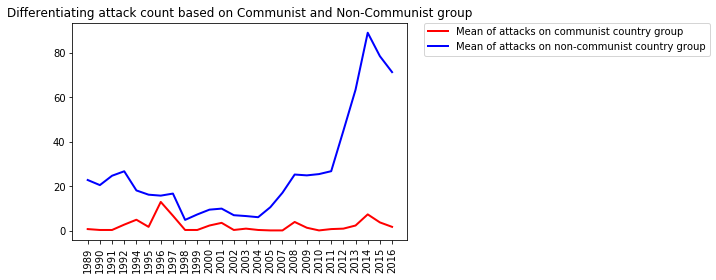

In [51]:
# Grouping the communist countries with year and getting the count of attacks per year
Comm_country_attack_count = Communist_Countires_df.groupby(['Year'])[['Year']].count()

# Taking the mean of count of attacks per year for unique countries.
Comm_country_attack_count = Comm_country_attack_count / 5

# Grouping the non-communist countries with year and getting the count of attacks per year
Non_comm_attack_count = Non_Communist_df.groupby(['Year'])[['Year']].count()

# Taking the mean of count of attacks per year for unique countries.
Non_comm_attack_count = Non_comm_attack_count/len(Non_Communist_df.Country.unique())

Years = ['1989','1990','1991','1992','1994','1995','1996','1997','1998','1999','2000','2001','2002',
         '2003','2004','2005','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']

# plotting the attack count on communist and non-communist group over the period of time
plt.plot( Years, Comm_country_attack_count, marker='', color='red', 
         linewidth=2, label="Mean of attacks on communist country group")
plt.plot( Years, Non_comm_attack_count, marker='', color='blue', 
         linewidth=2, label="Mean of attacks on non-communist country group")
plt.xticks(rotation='vertical')
plt.title("Differentiating attack count based on Communist and Non-Communist group")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

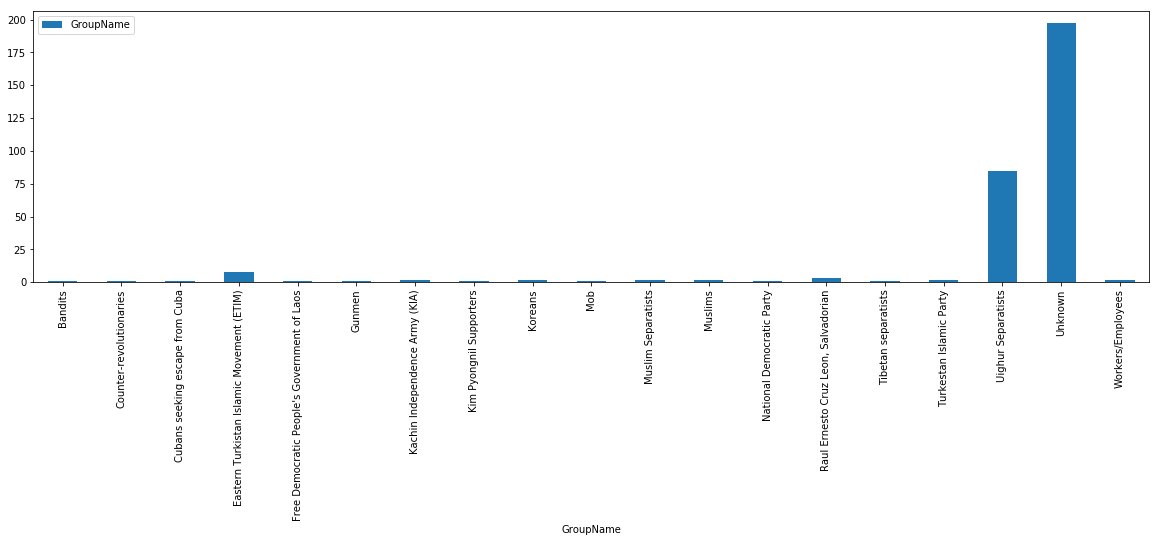

In [43]:
Comm_country_attack_groups = Communist_Countires_df.groupby(['GroupName'])[['GroupName']].count()
Comm_country_attack_groups.plot.bar(figsize=(20,5))

# Comparing number of deaths in United States due to terrorist activities and non-terrorist firearms activities from 2005 to 2015

This analysis arrises a question that is United States really threatened more by terrorist or by domestic firearms activities? Should there be a regulation to control the use of Guns in United States?

In [46]:
#2005 FireArms dataframe
_2005_df = pd.read_csv('2005_data.csv')
_2005_df.rename(columns = {'icd_code_10th_revision': 'TypeOfDeath_code'},inplace=True)
_2005_df = _2005_df[['TypeOfDeath_code']]
FireArm_code = ['X93','X94','X95','X73','X74','X72','W32','W33','W34','Y22','Y23','Y24','Y350','Y364']
FireArm_attacks_2005 = _2005_df[_2005_df.isin(FireArm_code)].count()

#2006 dataframe
_2006_df = pd.read_csv('2006_data.csv')
_2006_df.rename(columns = {'icd_code_10th_revision': 'TypeOfDeath_code'},inplace=True)
_2006_df = _2006_df[['TypeOfDeath_code']]
FireArm_attacks_2006 = _2006_df[_2006_df.isin(FireArm_code)].count()

#2007 dataframe
_2007_df = pd.read_csv('2007_data.csv')
_2007_df.rename(columns = {'icd_code_10th_revision': 'TypeOfDeath_code'},inplace=True)
_2007_df = _2007_df[['TypeOfDeath_code']]
FireArm_attacks_2007 = _2007_df[_2007_df.isin(FireArm_code)].count()

#2008 dataframe
_2008_df = pd.read_csv('2008_data.csv')
_2008_df.rename(columns = {'icd_code_10th_revision': 'TypeOfDeath_code'},inplace=True)
_2008_df = _2008_df[['TypeOfDeath_code']]
FireArm_attacks_2008 = _2008_df[_2008_df.isin(FireArm_code)].count()

#2009 dataframe
_2009_df = pd.read_csv('2009_data.csv')
_2009_df.rename(columns = {'icd_code_10th_revision': 'TypeOfDeath_code'},inplace=True)
_2009_df = _2009_df[['TypeOfDeath_code']]
FireArm_attacks_2009 = _2009_df[_2009_df.isin(FireArm_code)].count()

#2010 dataframe
_2010_df = pd.read_csv('2010_data.csv')
_2010_df.rename(columns = {'icd_code_10th_revision': 'TypeOfDeath_code'},inplace=True)
_2010_df = _2010_df[['TypeOfDeath_code']]
FireArm_attacks_2010 = _2010_df[_2010_df.isin(FireArm_code)].count()

#2011 dataframe
_2011_df = pd.read_csv('2011_data.csv')
_2011_df.rename(columns = {'icd_code_10th_revision': 'TypeOfDeath_code'},inplace=True)
_2011_df = _2011_df[['TypeOfDeath_code']]
FireArm_attacks_2011 = _2011_df[_2011_df.isin(FireArm_code)].count()

#2012 dataframe
_2012_df = pd.read_csv('2012_data.csv')
_2012_df.rename(columns = {'icd_code_10': 'TypeOfDeath_code'},inplace=True)
_2012_df = _2012_df[['TypeOfDeath_code']]
FireArm_attacks_2012 = _2012_df[_2012_df.isin(FireArm_code)].count()

#2013 dataframe
_2013_df = pd.read_csv('2013_data.csv')
_2013_df.rename(columns = {'icd_code_10th_revision': 'TypeOfDeath_code'},inplace=True)
_2013_df = _2013_df[['TypeOfDeath_code']]
FireArm_attacks_2013 = _2013_df[_2013_df.isin(FireArm_code)].count()

#2014 dataframe
_2014_df = pd.read_csv('2014_data.csv')
_2014_df.rename(columns = {'icd_code_10th_revision': 'TypeOfDeath_code'},inplace=True)
_2014_df = _2014_df[['TypeOfDeath_code']]
FireArm_attacks_2014 = _2014_df[_2014_df.isin(FireArm_code)].count()

#2015 dataframe
_2015_df = pd.read_csv('2015_data.csv')
_2015_df.rename(columns = {'icd_code_10th_revision': 'TypeOfDeath_code'},inplace=True)
_2015_df = _2015_df[['TypeOfDeath_code']]
FireArm_attacks_2015 = _2015_df[_2015_df.isin(FireArm_code)].count()

C:\Users\madel\Anaconda3\envs\py2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning:

Columns (39,40,41,42,43,44,45,46,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\madel\Anaconda3\envs\py2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning:

Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\madel\Anaconda3\envs\py2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning:

Columns (39,40,41,42,43,44,45,46,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\madel\Anaconda3\envs\py2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning:

Columns (39,40,41,42,43,44,45,46,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\madel\Anaconda3\envs\py2\lib\sit

In [47]:
# Getting the total number of attacks and deaths in United States due to terrorist activities from terror_df dataframe per year 
# from 2005 to 2015

terrorist_attacks_2005 = terror_df[(terror_df.Year == 2005) & (terror_df.Country == 'United States')]
terror_attack_count_2005 = terrorist_attacks_2005['Country'].count()
terrorist_killing_2005 = terrorist_attacks_2005['Killed'].sum()
terrorist_attacks_2006 = terror_df[(terror_df.Year == 2006) & (terror_df.Country == 'United States')]
terror_attack_count_2006 = terrorist_attacks_2006['Country'].count()
terrorist_killing_2006 = terrorist_attacks_2006['Killed'].sum()
terrorist_attacks_2007 = terror_df[(terror_df.Year == 2007) & (terror_df.Country == 'United States')]
terror_attack_count_2007 = terrorist_attacks_2007['Country'].count()
terrorist_killing_2007 = terrorist_attacks_2007['Killed'].sum()
terrorist_attacks_2008 = terror_df[(terror_df.Year == 2008) & (terror_df.Country == 'United States')]
terror_attack_count_2008 = terrorist_attacks_2008['Country'].count()
terrorist_killing_2008 = terrorist_attacks_2008['Killed'].sum()
terrorist_attacks_2009 = terror_df[(terror_df.Year == 2009) & (terror_df.Country == 'United States')]
terror_attack_count_2009 = terrorist_attacks_2009['Country'].count()
terrorist_killing_2009 = terrorist_attacks_2009['Killed'].sum()
terrorist_attacks_2010 = terror_df[(terror_df.Year == 2010) & (terror_df.Country == 'United States')]
terror_attack_count_2010 = terrorist_attacks_2010['Country'].count()
terrorist_killing_2010 = terrorist_attacks_2010['Killed'].sum()
terrorist_attacks_2011 = terror_df[(terror_df.Year == 2011) & (terror_df.Country == 'United States')]
terror_attack_count_2011 = terrorist_attacks_2011['Country'].count()
terrorist_killing_2011 = terrorist_attacks_2011['Killed'].sum()
terrorist_attacks_2012 = terror_df[(terror_df.Year == 2012) & (terror_df.Country == 'United States')]
terror_attack_count_2012 = terrorist_attacks_2012['Country'].count()
terrorist_killing_2012 = terrorist_attacks_2012['Killed'].sum()
terrorist_attacks_2013 = terror_df[(terror_df.Year == 2013) & (terror_df.Country == 'United States')]
terror_attack_count_2013 = terrorist_attacks_2013['Country'].count()
terrorist_killing_2013 = terrorist_attacks_2013['Killed'].sum()
terrorist_attacks_2014 = terror_df[(terror_df.Year == 2014) & (terror_df.Country == 'United States')]
terror_attack_count_2014 = terrorist_attacks_2014['Country'].count()
terrorist_killing_2014 = terrorist_attacks_2014['Killed'].sum()
terrorist_attacks_2015 = terror_df[(terror_df.Year == 2015) & (terror_df.Country == 'United States')]
terror_attack_count_2015 = terrorist_attacks_2015['Country'].count()
terrorist_killing_2015 = terrorist_attacks_2015['Killed'].sum()

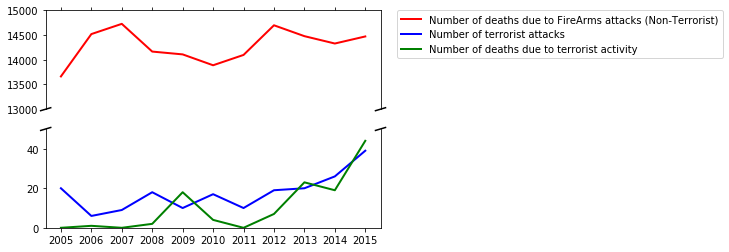

In [50]:
# creating an array of firearms attack per year from 2005 to 2015
values1 = [FireArm_attacks_2005,FireArm_attacks_2006,FireArm_attacks_2007,FireArm_attacks_2008,FireArm_attacks_2009,
          FireArm_attacks_2010,FireArm_attacks_2011,FireArm_attacks_2012,FireArm_attacks_2013,FireArm_attacks_2014,
          FireArm_attacks_2015]

# creating an array of terrorist attacks per year from 2005 to 2015
values2 = [terror_attack_count_2005,terror_attack_count_2006,terror_attack_count_2007,terror_attack_count_2008,
           terror_attack_count_2009,terror_attack_count_2010,terror_attack_count_2011,terror_attack_count_2012,
          terror_attack_count_2013,terror_attack_count_2014,terror_attack_count_2015]

# creating an array of terrorist attack deaths per year from 2005 to 2015
values3 = [terrorist_killing_2005,terrorist_killing_2006,terrorist_killing_2007,terrorist_killing_2008,terrorist_killing_2009,
          terrorist_killing_2010,terrorist_killing_2011,terrorist_killing_2012,terrorist_killing_2013,terrorist_killing_2014,
          terrorist_killing_2015]

X = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

# cutting the y-axis into two portions 
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

ax.plot( X, values1, marker='', color='red', linewidth=2, label="Number of deaths due to FireArms attacks (Non-Terrorist)")
ax2.plot( X, values1, marker='', color='red', linewidth=2, label="Number of deaths due to FireArms attacks (Non-Terrorist)")
ax.plot( X, values2, marker='', color='blue', linewidth=2, label="Number of terrorist attacks")
ax2.plot( X, values2, marker='', color='blue', linewidth=2, label="Number of terrorist attacks")
ax.plot( X, values3, marker='', color='green', linewidth=2, label="Number of deaths due to terrorist activity")
ax2.plot( X, values3, marker='', color='green', linewidth=2, label="Number of deaths due to terrorist activity")

plt.legend(bbox_to_anchor=(1.05, 2.2), loc=2, borderaxespad=0.)

ax.set_ylim(13000,15000) 
ax2.set_ylim(0,50) 


# hiding the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off') 
ax2.xaxis.tick_bottom()

d = .015  
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs) 
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

#ax.set_ylabel("Number of attacks/deaths")
#ax.set_xlabel("Year")

#plt.title("Comparing number of deaths due to terrorist and non-terrorist firearms activities")
plt.show()

In [26]:
#Count all the attacks of thse groups in the discussed countries during 2016
attacks_in_2016_by_groups = terror_df[((terror_df.GroupName == 'Islamic State of Iraq and the Levant (ISIL)') | (terror_df.GroupName == 'Al-Shabaab') | (terror_df.GroupName == 'Taliban') | (terror_df.GroupName == 'Tehrik-i-Taliban Pakistan (TTP)'))  & (terror_df.Country.isin(['Yemen', 'Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan'])) & (terror_df.Year == 2016)]
attacks_in_2016_by_groups = attacks_in_2016_by_groups.Year.count()

#Count all attacks in the discussed countries during 2016
all_attacks= terror_df[terror_df.Country.isin(['Yemen','Iraq', 'Afghanistan', 'Pakistan', 'Somalia', 'Syria', 'Libya', 'Sudan']) &(terror_df.Year == 2016)]
all_attacks = all_attacks.Year.count()

all_attacks

8005